# pylimons: Python Linac MOdeling aNd Simulation

In [1]:
import numpy as np

## Utils

In [2]:
import utils

In [3]:
utils.h

6.62607015e-34

In [4]:
from utils import physical_constants as pconstants

In [5]:
pconstants.c

299792458.0

In [6]:
pconstants.m_e

0.51099895

## Beam

### Particle Class

In [7]:
from beam import Particle

In [8]:
particle = Particle('electron', 10)

In [9]:
particle.get_gamma()

20.569511835591836

In [10]:
particle.get_momentum()

9.98693546955716

In [11]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [12]:
particle.update_energy(20)

In [13]:
particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 20 MeV
particle momentum : 19.99347093611059 MeV/c
particle gamma    : 40.13902367118367
particle beta     : 0.9996896128022548


### Bunch Class

In [14]:
from beam import Bunch

In [15]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

#Bunch(sepcies, energy, dimension, num_particles, twiss_x, twiss_y)

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [16]:
particles = bunch.generate_transverse_matched_beam_distribution()
print (particles.shape)

(4, 10000)


In [17]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [18]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [19]:
x = particles[0,:]
xp = particles[1,:]

In [20]:
from matplotlib import pyplot as plt

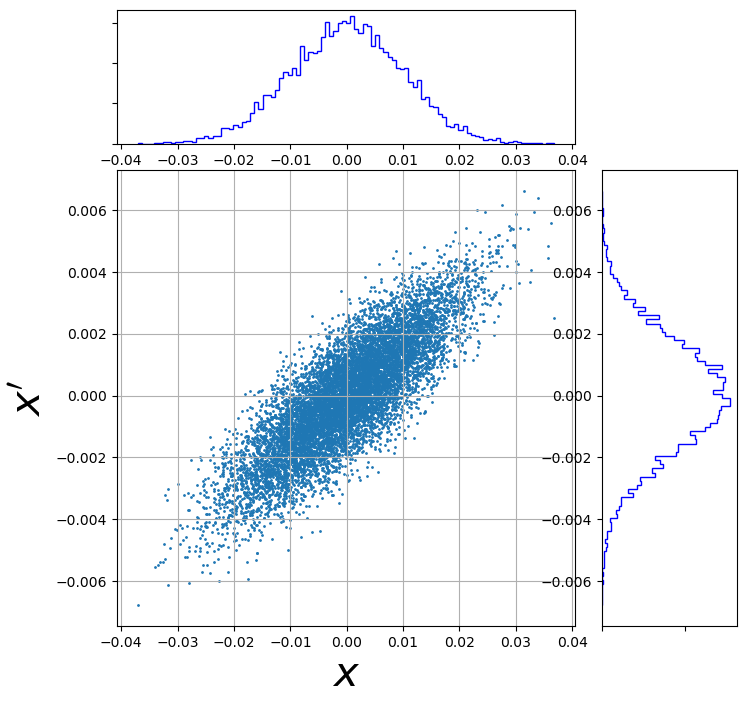

In [21]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

## Elements

### Element Class (Parent Class)

In [22]:
from elements import Element

In [23]:
quad = Element("qf", "quadrupole", 0.2, 20)

In [24]:
quad.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.2
element strength : 20
element aperture : Not defined


In [25]:
quad2 = quad.element_copy("quad2")

In [26]:
quad2.set_element_property(length=0.4)

In [27]:
quad2.get_element_property("length")

The element's length is 0.4


In [28]:
quad2.print_element_properties()

element name     : quad2
element type     : quadrupole
element length   : 0.4
element strength : 20
element aperture : Not defined


### Drift Class (Child Class)

In [29]:
from elements import Drift

In [30]:
d1 = Drift("d1", "drift", 10)

In [31]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [32]:
d1.set_element_property(length=20)
d1.get_element_property("length")

The element's length is 20


In [33]:
matd1 = d1.get_transfer_matrix()
print (matd1)

[[ 1. 20.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1. 20.]
 [ 0.  0.  0.  1.]]


In [34]:
d1.propagate(bunch)
new_particles = bunch.state

In [35]:
print (matd1.shape, particles.shape)

(4, 4) (4, 10000)


In [36]:
new_particles.shape

(4, 10000)

In [37]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

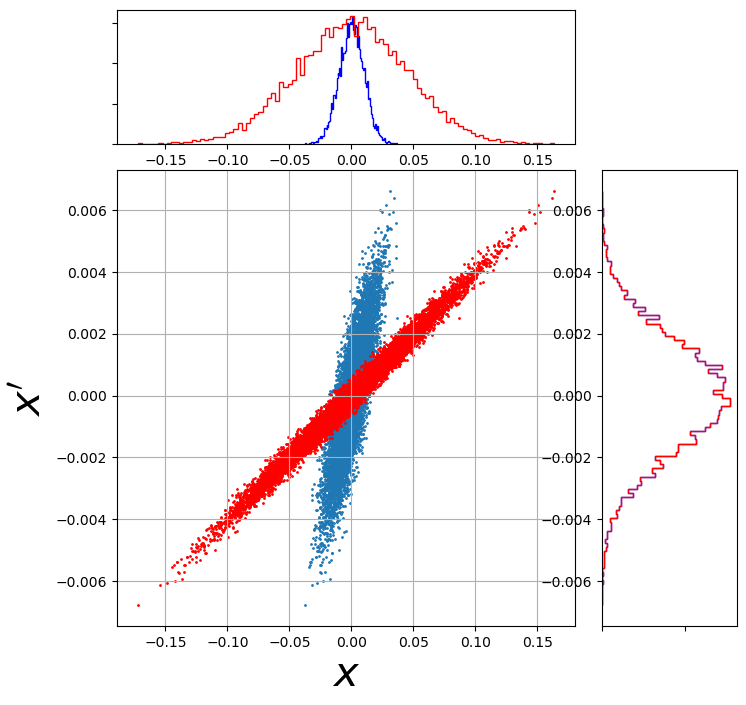

In [38]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### SBend Class

In [39]:
from elements import Sbend

In [40]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [41]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [42]:
b1.get_element_property("length")
b1.get_element_property("strength")
b1.get_element_property("angle")
b1.get_element_property("phi")

The element's length is 1.5
The element's strength is 22.5
The element's angle is 22.5
The element's phi is 0.39269908169872414


In [43]:
matb1 = b1.get_transfer_matrix()
print (matb1)

[[ 0.92387953  1.46174304  0.          0.        ]
 [-0.10018629  0.92387953  0.          0.        ]
 [ 0.          0.          1.          1.5       ]
 [ 0.          0.          0.          1.        ]]


In [44]:
np.linalg.det(matb1[0:2,0:2])

0.9999999999999997

In [45]:
from beam import Bunch
from matplotlib import pyplot as plt

In [46]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [47]:
x = particles[0,:]
xp = particles[1,:]

In [48]:
b1.propagate(bunch)
new_particles = bunch.state

In [49]:
print (matb1.shape, particles.shape)

(4, 4) (4, 10000)


In [50]:
new_particles.shape

(4, 10000)

In [51]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

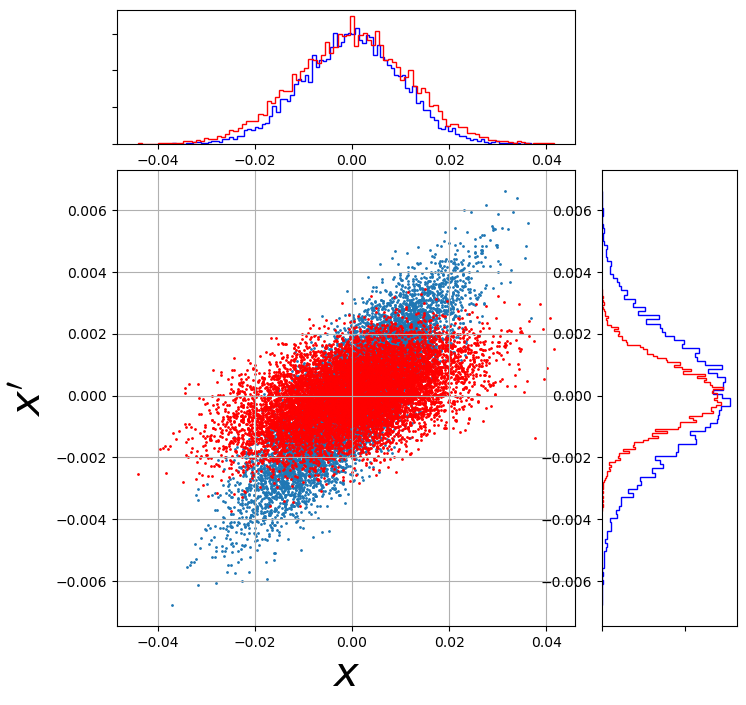

In [52]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [53]:
y = particles[2,:]
yp = particles[3,:]

In [54]:
ny = new_particles[2,:]
nyp = new_particles[3,:]

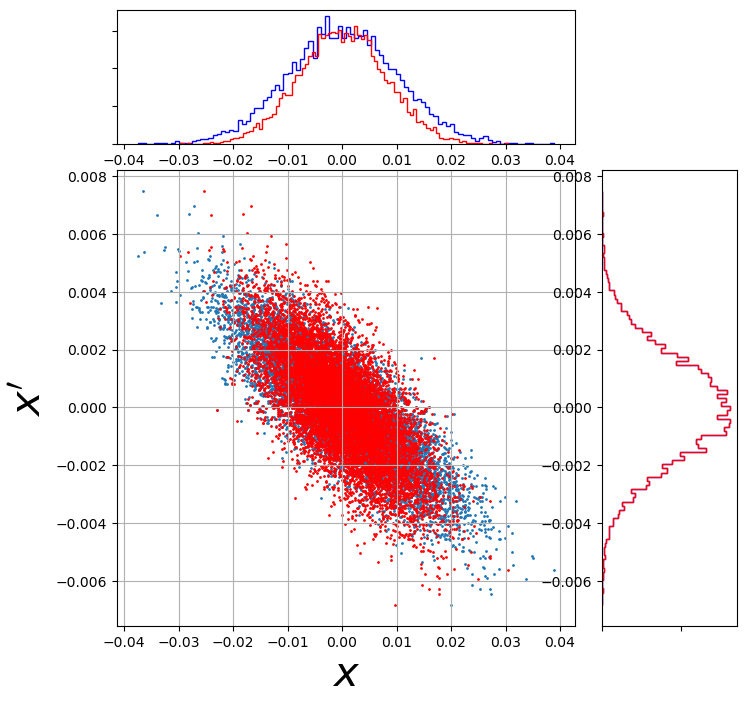

In [55]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(y, yp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(ny, nyp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(y, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(yp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(ny, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nyp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

###  Quadrupole Class

In [56]:
from elements import Quadrupole

In [57]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [58]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [59]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [60]:
qf.get_element_property("length")
qf.get_element_property("strength")
qf.get_element_property("k1")

The element's length is 0.4
The element's strength is 1.2
The element's k1 is 1.2


In [61]:
qd.get_element_property("length")
qd.get_element_property("strength")
qd.get_element_property("k1")

The element's length is 0.4
The element's strength is -1.2
The element's k1 is -1.2


In [62]:
matqf = qf.get_transfer_matrix()
print (matqf)

[[ 0.9055262   0.38732232  0.          0.        ]
 [-0.46478678  0.9055262   0.          0.        ]
 [ 0.          0.          1.09754586  0.41292344]
 [ 0.          0.          0.49550813  1.09754586]]


In [63]:
matqd = qd.get_transfer_matrix()
print (matqd)

[[ 1.09754586  0.41292344  0.          0.        ]
 [ 0.49550813  1.09754586  0.          0.        ]
 [ 0.          0.          0.9055262   0.38732232]
 [ 0.          0.         -0.46478678  0.9055262 ]]


In [64]:
print (np.linalg.det(matqf[0:2, 0:2]), np.linalg.det(matqf[2:4, 2:4]), np.linalg.det(matqd[0:2, 0:2]), np.linalg.det(matqd[2:4, 2:4]))

0.9999999999999997 1.0000000000000002 1.0000000000000002 0.9999999999999997


In [65]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [66]:
x = particles[0,:]
xp = particles[1,:]

In [67]:
qf.propagate(bunch)
new_particles = bunch.state

In [68]:
print (matqf.shape, particles.shape)

(4, 4) (4, 10000)


In [69]:
new_particles.shape

(4, 10000)

In [70]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

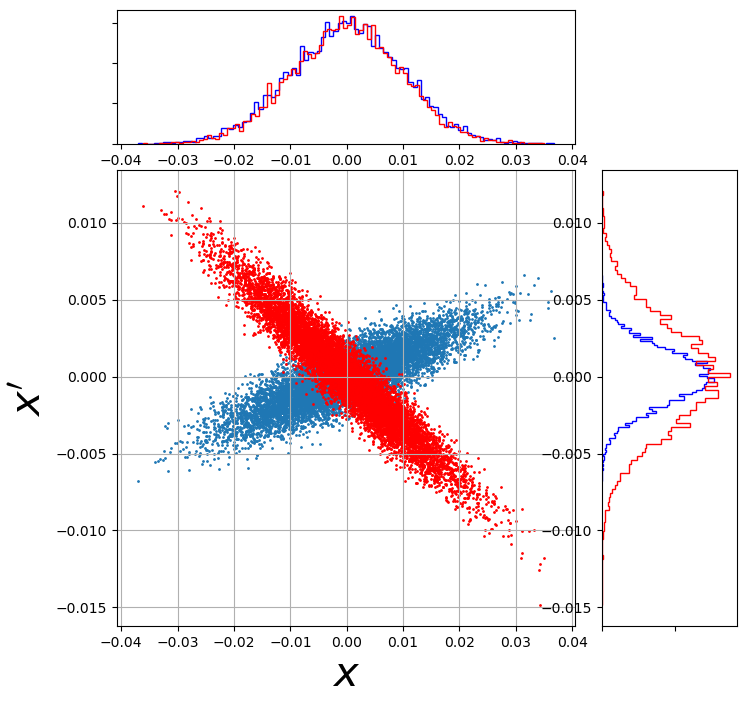

In [71]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [72]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [73]:
x = particles[0,:]
xp = particles[1,:]

In [74]:
qd.propagate(bunch)
new_particles = bunch.state

In [75]:
print (matqd.shape, particles.shape)

(4, 4) (4, 10000)


In [76]:
new_particles.shape

(4, 10000)

In [77]:
nx = new_particles[0,:]
nxp = new_particles[1,:]

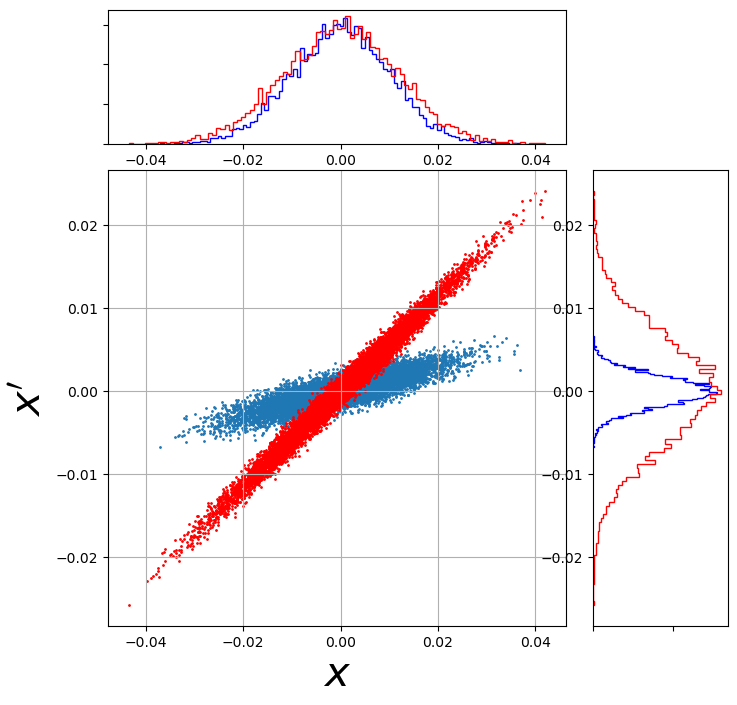

In [78]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, nxp, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Solenoid Class

In [79]:
from elements import Solenoid

In [80]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [81]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [82]:
s1.get_element_property("length")
s1.get_element_property("strength")
s1.get_element_property("ks")

The element's length is 2.0
The element's strength is 0.7
The element's ks is 0.7


In [83]:
mats1 = s1.get_transfer_matrix()
print (mats1)

[[ 0.02888883  0.23927725  0.16749408  0.16031009]
 [-0.11724585  0.02888883 -0.07855194  0.16749408]
 [-0.16749408 -0.4785545   0.02888883  0.23927725]
 [ 0.07855194 -0.16749408 -0.11724585  0.02888883]]


In [84]:
print(np.linalg.det(mats1[0:2, 0:2]), np.linalg.det(mats1[2:4, 2:4]))

0.028888829665670947 0.028888829665670947


In [85]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [86]:
x = particles[0,:]
y = particles[2,:]

In [87]:
s1.propagate(bunch)
new_particles = bunch.state

In [88]:
print (mats1.shape, particles.shape)

(4, 4) (4, 10000)


In [89]:
new_particles.shape

(4, 10000)

In [90]:
nx = new_particles[0,:]
ny = new_particles[2,:]

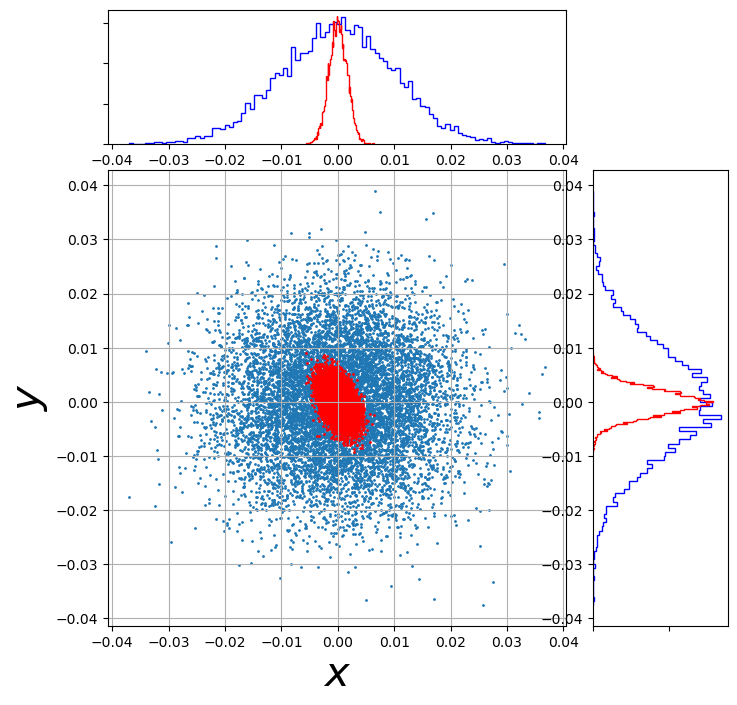

In [91]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Marker class

In [92]:
from elements import Marker

In [93]:
m1 = Marker("m1", "marker")

In [94]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [95]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

In [96]:
x = particles[0,:]
y = particles[2,:]

In [97]:
m1.propagate(bunch)
new_particles = bunch.state

In [98]:
new_particles.shape

(4, 10000)

In [99]:
nx = new_particles[0,:]
ny = new_particles[2,:]

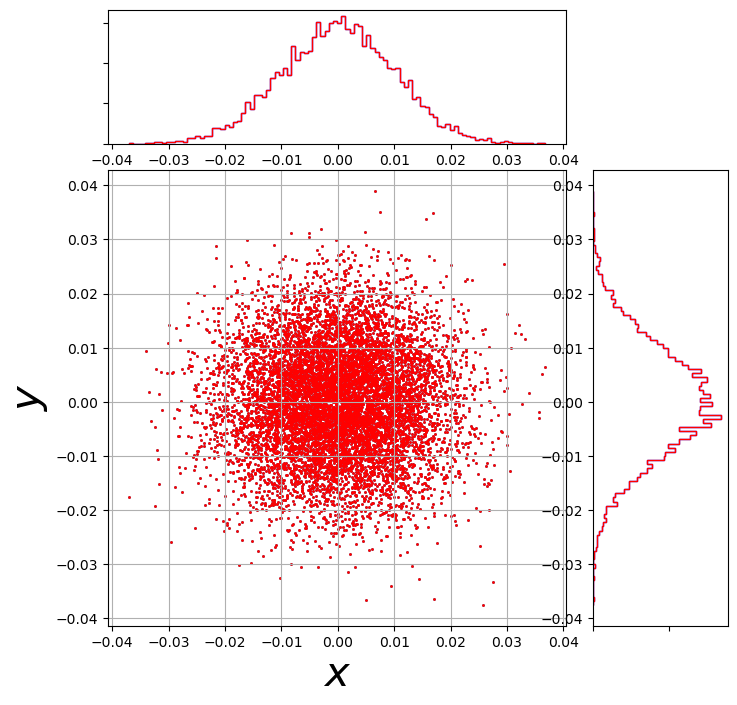

In [100]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Aperture

### Rectangular Aperture

In [101]:
from elements.aperture import Rectangular_aperture as ra

In [102]:
ra1 = ra(["rectangular", 0.01, 0.02])

In [103]:
new_particles, lost = ra1.apply_rectangular_aperture(particles)

In [104]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 2601) 7399


In [105]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

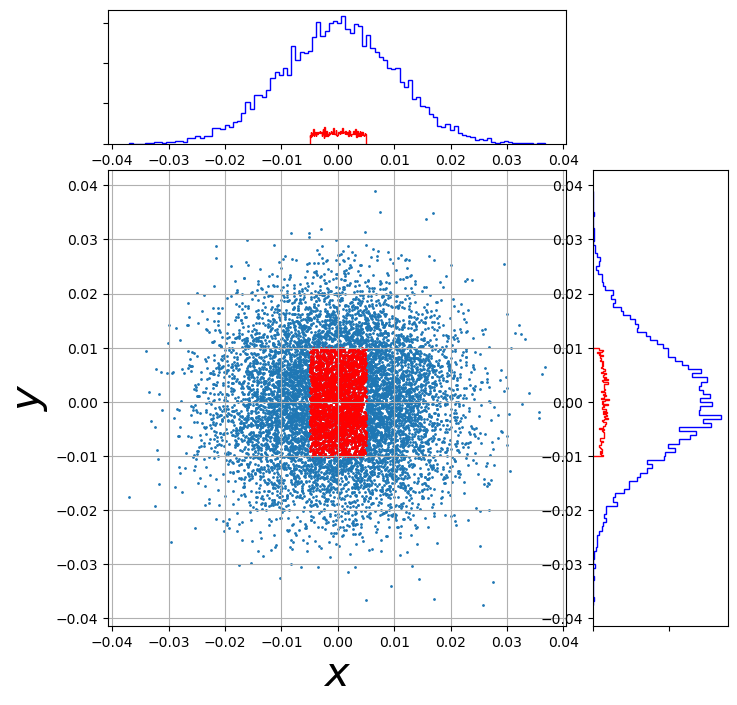

In [106]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Circular Aperture

In [107]:
from elements.aperture import Circular_aperture as ca

In [108]:
ca1 = ca(["circular", 0.01])

In [109]:
new_particles, lost = ca1.apply_circular_aperture(particles)

In [110]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 3875) 6125


In [111]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

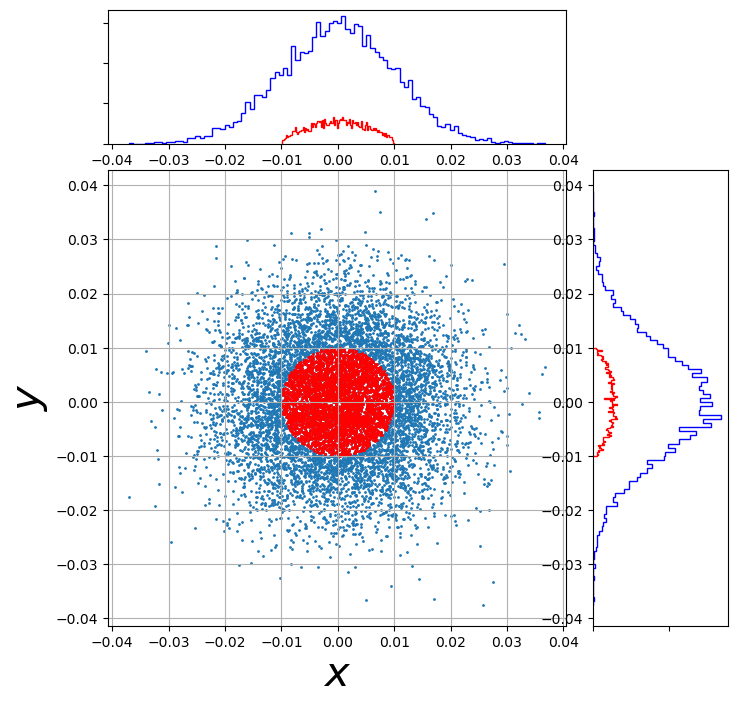

In [112]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Elliptical Aperture

In [113]:
from elements.aperture import Elliptical_aperture as ea

In [114]:
ea1 = ea(["elliptical", 0.01, 0.005])

In [115]:
new_particles, lost = ea1.apply_elliptical_aperture(particles)

In [116]:
print (particles.shape, new_particles.shape, lost)

(4, 10000) (4, 2134) 7866


In [117]:
nx2 = new_particles[0,:]
ny2 = new_particles[2,:]

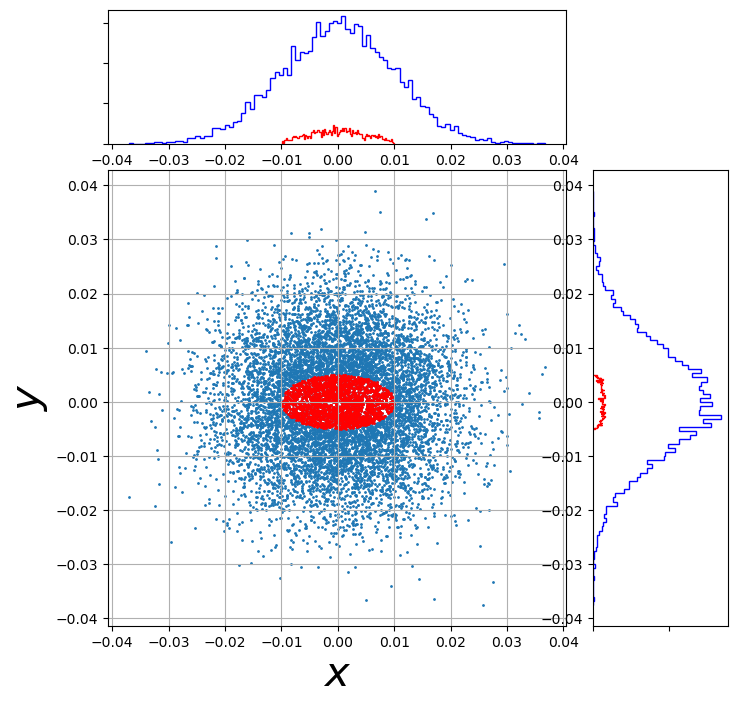

In [118]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx2, ny2, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx2, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny2, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Apertures @ Elements

### Test Marker Element

In [119]:
from matplotlib import pyplot as plt

In [120]:
from elements import Marker

In [121]:
m2 = Marker("m2", "marker")

In [122]:
m2.print_element_properties()

element name     : m2
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [123]:
m2.get_aperture_properties()

0

In [124]:
m2.set_aperture_properties(["rectangular", 1e-2, 2e-2])

In [125]:
m2.get_aperture_properties()

['rectangular', 0.01, 0.02]

In [126]:
m2.print_element_properties()

element name     : m2
element type     : marker
element length   : 0
element strength : 0
element aperture : ['rectangular', 0.01, 0.02]


In [127]:
m3 = Marker("m3", "marker", aperture=["circular", 1e-2])

In [128]:
m3.print_element_properties()

element name     : m3
element type     : marker
element length   : 0
element strength : 0
element aperture : ['circular', 0.01]


In [129]:
m3.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


In [130]:
m3.get_aperture_properties()

['circular', 0.01]

In [131]:
from beam import Bunch

In [132]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [133]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [134]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [135]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [136]:
m3.propagate(bunch)

In [137]:
bunch.print_bunch_properties()

number of macro particles : 3875
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 4.827937133055183e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 4.743272333710969e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [138]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

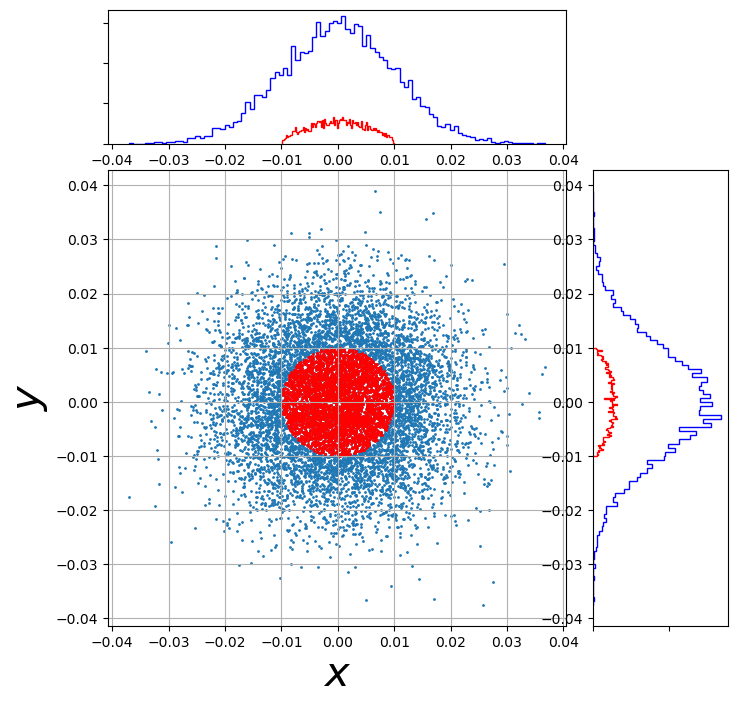

In [139]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Drift Element

In [140]:
from elements import Drift

In [141]:
d1 = Drift("d1", "drift", 10)

In [142]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : Not defined


In [143]:
d1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [144]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 10
element strength : 0
element aperture : ['rectangular', 0.01, 0.03]


In [145]:
d1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


In [146]:
d1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [147]:
from beam import Bunch

In [148]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [149]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [150]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [151]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [152]:
d1.propagate(bunch)

In [153]:
bunch.print_bunch_properties()

number of macro particles : 1244
beta_x                    : 72.5 m
alpha_x                   : -4.75 m^(1/2)
emittance_x               : 1.0814214467710094e-06 mm-mrad
beta_y                    : 12.5 m
alpha_y                   : -1.75 m^(1/2)
emittance_y               : 6.8637910901673245e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10


In [154]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

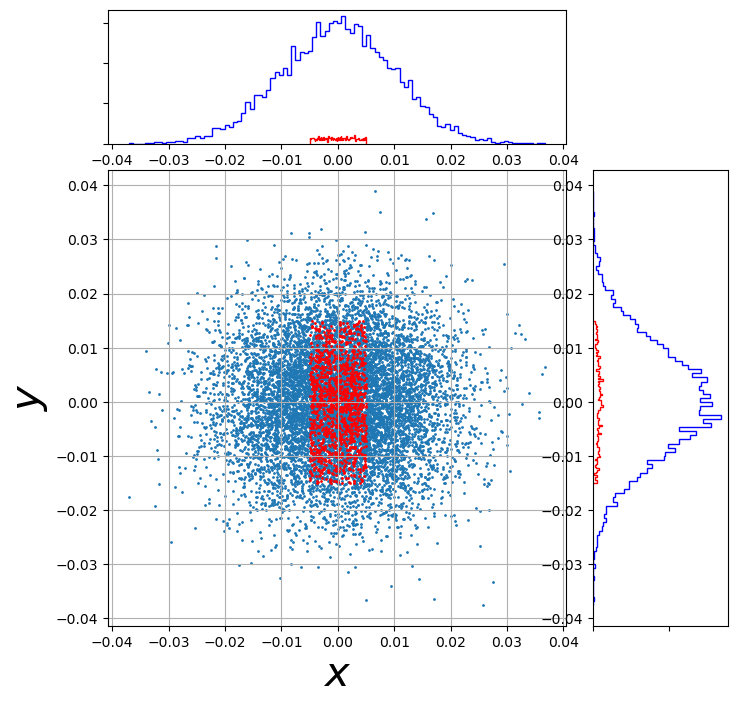

In [155]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [156]:
from elements import Sbend

In [157]:
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=["circular", 1e-2])

In [158]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [159]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : ['circular', 0.01]


In [160]:
b1.get_element_property("aperture")

The element's aperture is ['circular', 0.01]


In [161]:
b1.get_aperture_properties()

['circular', 0.01]

In [162]:
from beam import Bunch

In [163]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [164]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [165]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [166]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [167]:
b1.propagate(bunch)

In [168]:
bunch.print_bunch_properties()

number of macro particles : 4115
beta_x                    : 13.281382458736953 m
alpha_x                   : -0.573963763790084 m^(1/2)
emittance_x               : 4.2885204370095274e-06 mm-mrad
beta_y                    : 6.23125 m
alpha_y                   : 1.0125 m^(1/2)
emittance_y               : 5.800245973789467e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 1.5


In [169]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

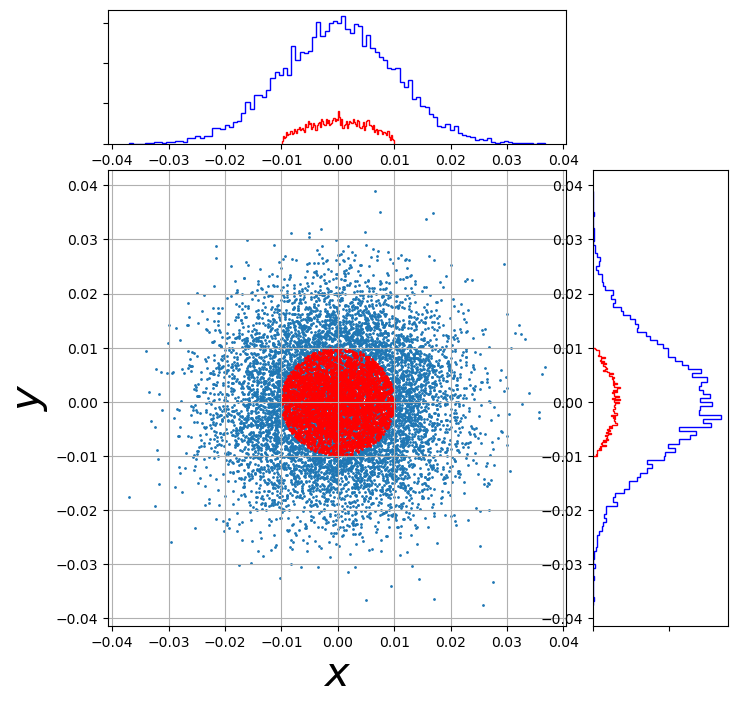

In [170]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quad Element

In [171]:
from elements import Quadrupole

In [172]:
qf1 = Quadrupole("qf", "quadrupole", 0.4, 1.2)

In [173]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [174]:
qf1.set_aperture_properties(["rectangular", 1e-2, 3e-2])

In [175]:
qf1.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : ['rectangular', 0.01, 0.03]


In [176]:
qf1.get_element_property("aperture")

The element's aperture is ['rectangular', 0.01, 0.03]


In [177]:
qf1.get_aperture_properties()

['rectangular', 0.01, 0.03]

In [178]:
from beam import Bunch

In [179]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [180]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [181]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [182]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [183]:
qf1.propagate(bunch)

In [184]:
bunch.print_bunch_properties()

number of macro particles : 3402
beta_x                    : 9.300724614618339 m
alpha_x                   : 3.1348455858000484 m^(1/2)
emittance_x               : 2.9674863775940153e-06 mm-mrad
beta_y                    : 10.741876362904641 m
alpha_y                   : -3.4718990218904144 m^(1/2)
emittance_y               : 7.347975449366863e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0.4


In [185]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

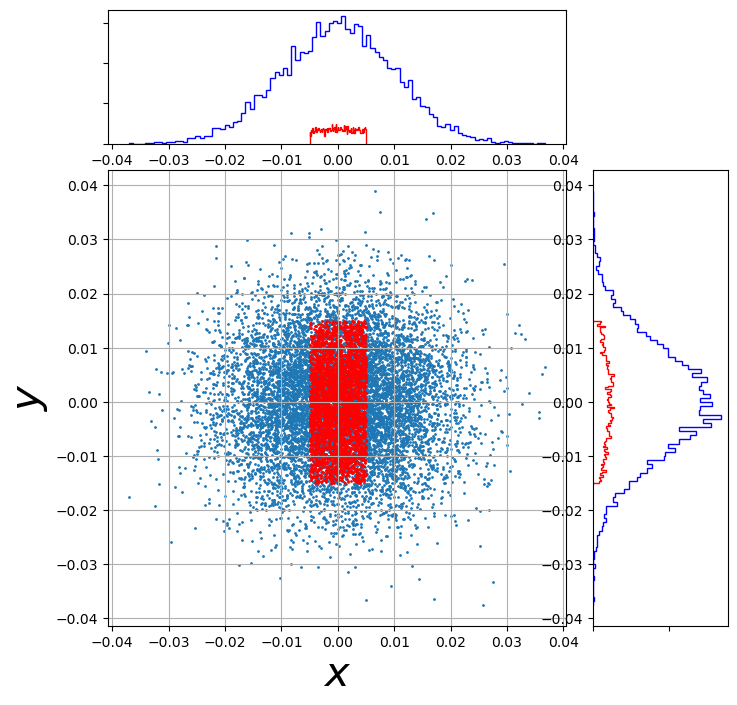

In [186]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Solenoid Element

In [187]:
from elements import Solenoid

In [188]:
s1 = Solenoid("s1", "solenoid", 2.0, 0.7)

In [189]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : Not defined


In [190]:
s1.set_aperture_properties(["elliptical", 0.01, 0.005])

In [191]:
s1.print_element_properties()

element name     : s1
element type     : solenoid
element length   : 2.0
element strength : 0.7
element aperture : ['elliptical', 0.01, 0.005]


In [192]:
s1.get_element_property("aperture")

The element's aperture is ['elliptical', 0.01, 0.005]


In [193]:
s1.get_aperture_properties()

['elliptical', 0.01, 0.005]

In [194]:
from beam import Bunch

In [195]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [196]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [197]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [198]:
particles = bunch.state
x = particles[0,:]
y = particles[2,:]

In [199]:
s1.propagate(bunch)

In [200]:
bunch.print_bunch_properties()

number of macro particles : 9537
beta_x                    : 0.04769038474531104 m
alpha_x                   : 0.07245396278526789 m^(1/2)
emittance_x               : 1.0505997924763735e-06 mm-mrad
beta_y                    : 0.0062157464172875355 m
alpha_y                   : -0.00920513933503207 m^(1/2)
emittance_y               : 2.709043529944662e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 2.0


In [201]:
new_particles = bunch.state
nx = new_particles[0,:]
ny = new_particles[2,:]

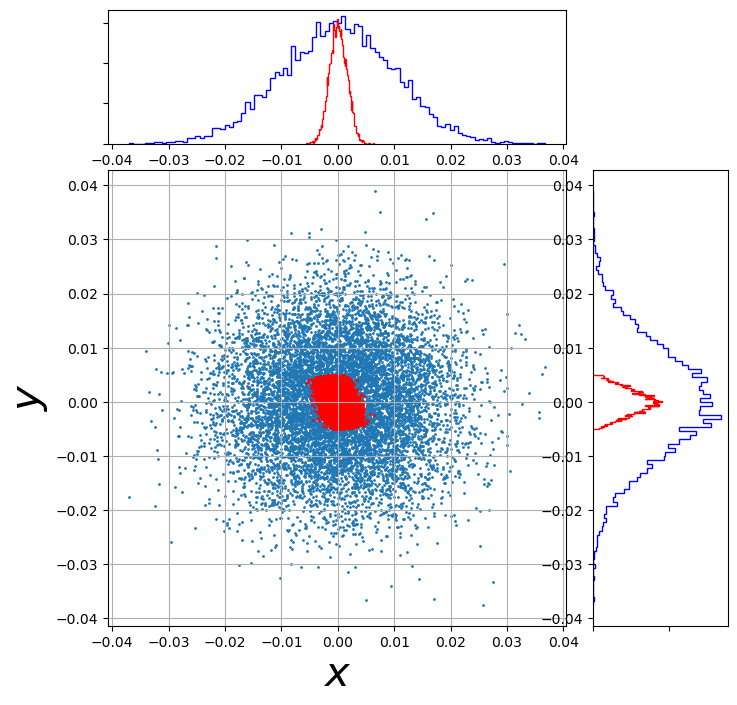

In [202]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Reference Particle

In [203]:
import numpy as np
from matplotlib import pyplot as plt

In [204]:
from beam import Bunch

In [205]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [206]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [207]:
bunch.particle.print_particle_properties()

particle species  : electron
particle charge   : -1
particle mass     : 0.51099895 MeV/c^2
particle energy   : 10 MeV
particle momentum : 9.98693546955716 MeV/c
particle gamma    : 20.569511835591836
particle beta     : 0.9988175606506312


In [208]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [209]:
particles = bunch.state

In [210]:
bunch.particle.update_s(10)
print (bunch.particle.get_s())

10


In [211]:
bunch.state

array([[-0.01136938, -0.00609099,  0.00089294, ..., -0.00639145,
         0.01864733, -0.00422042],
       [-0.00135286, -0.00123116,  0.00097578, ..., -0.00023959,
         0.00353605, -0.00299811],
       [-0.00126618, -0.00741665, -0.01180483, ...,  0.01392833,
        -0.01233849,  0.00511634],
       [ 0.00081738,  0.00076475,  0.002428  , ..., -0.00083702,
         0.00187068, -0.00235407]])

In [212]:
particles

array([[-0.01136938, -0.00609099,  0.00089294, ..., -0.00639145,
         0.01864733, -0.00422042],
       [-0.00135286, -0.00123116,  0.00097578, ..., -0.00023959,
         0.00353605, -0.00299811],
       [-0.00126618, -0.00741665, -0.01180483, ...,  0.01392833,
        -0.01233849,  0.00511634],
       [ 0.00081738,  0.00076475,  0.002428  , ..., -0.00083702,
         0.00187068, -0.00235407]])

In [213]:
refparticle = bunch.particle

In [214]:
refparticle.get_s()

10

In [215]:
refparticle.update_s(2)

In [216]:
refparticle.get_s()

12

In [217]:
bunch.particle.get_s()

12

In [218]:
bunch.particle.reset_s()

### Test Drift Element

In [219]:
from elements import Drift

In [220]:
d1 = Drift("d1", "drift", 5)

In [221]:
d1.print_element_properties()

element name     : d1
element type     : drift
element length   : 5
element strength : 0
element aperture : Not defined


In [222]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0020134166012031e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [223]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [224]:
d1.propagate(bunch)

In [225]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 33.125 m
alpha_x                   : -3.125 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 3.125 m
alpha_y                   : -0.125 m^(1/2)
emittance_y               : 1.0020134166012028e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [226]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

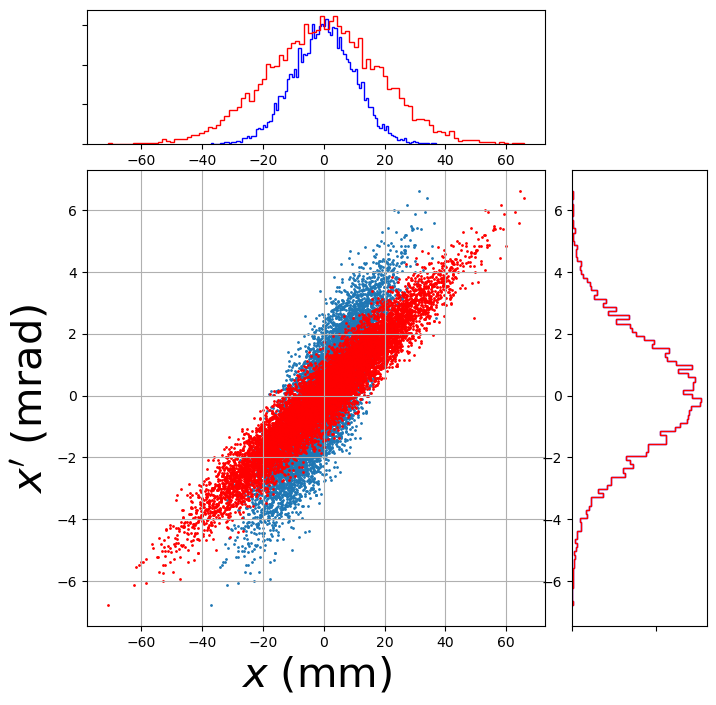

In [227]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Sbend Element

In [228]:
from elements import Sbend

In [229]:
b1 = Sbend("b1", "sbend", 1.5, 22.5)

In [230]:
b1.print_element_properties()

element name     : b1
element type     : sbend
element length   : 1.5
element strength : 22.5
element aperture : Not defined


In [231]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 33.125 m
alpha_x                   : -3.125 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 3.125 m
alpha_y                   : -0.125 m^(1/2)
emittance_y               : 1.0020134166012028e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 5


In [232]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [233]:
b1.propagate(bunch)

In [234]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 37.408846657472296 m
alpha_x                   : 0.4174391323007811 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 4.23125 m
alpha_y                   : -0.6125 m^(1/2)
emittance_y               : 1.0020134166012028e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.5


In [235]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

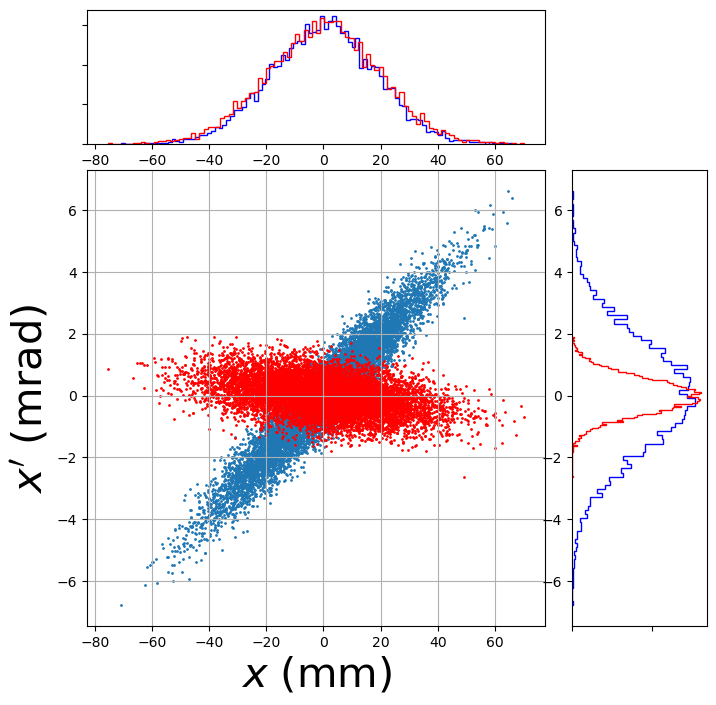

In [236]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Quadrupole Element

In [237]:
from elements import Quadrupole

In [238]:
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)

In [239]:
qf.print_element_properties()

element name     : qf
element type     : quadrupole
element length   : 0.4
element strength : 1.2
element aperture : Not defined


In [240]:
qd.print_element_properties()

element name     : qd
element type     : quadrupole
element length   : 0.4
element strength : -1.2
element aperture : Not defined


In [241]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 37.408846657472296 m
alpha_x                   : 0.4174391323007811 m^(1/2)
emittance_x               : 1.0065918218368294e-05 mm-mrad
beta_y                    : 4.23125 m
alpha_y                   : -0.6125 m^(1/2)
emittance_y               : 1.0020134166012028e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.5


In [242]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [243]:
d1.propagate(bunch)
qf.propagate(bunch)
d1.propagate(bunch)
qd.propagate(bunch)
d1.propagate(bunch)

In [244]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 1.006591821823332e-05 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 1.0020134166022378e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [245]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

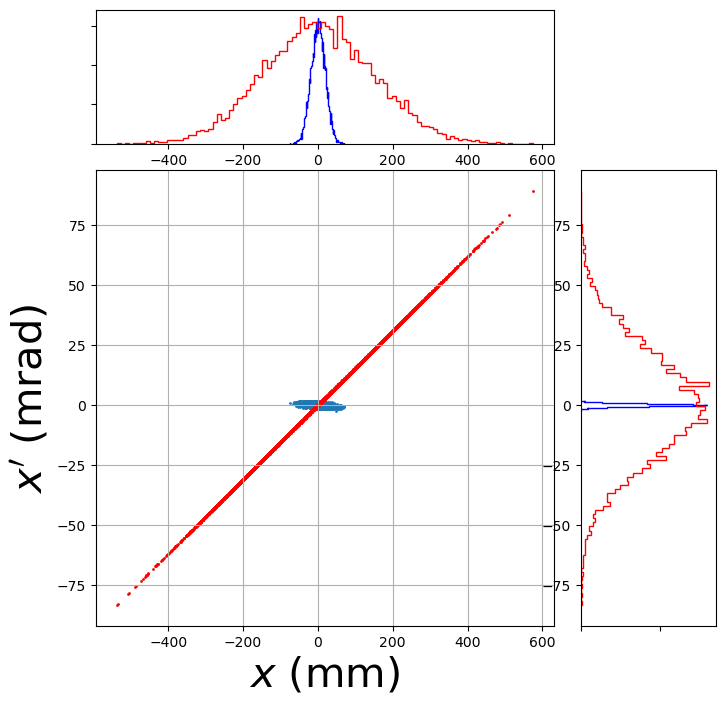

In [246]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### Test Marker

In [247]:
from elements import Marker

In [248]:
m1 = Marker("m1", "marker")

In [249]:
m1.print_element_properties()

element name     : m1
element type     : marker
element length   : 0
element strength : 0
element aperture : Not defined


In [250]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 1.006591821823332e-05 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 1.0020134166022378e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [251]:
particles = bunch.state
x = particles[0,:]
xp = particles[1,:]

In [252]:
m1.propagate(bunch)

In [253]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 2186.6455875894667 m
alpha_x                   : -339.1004662141573 m^(1/2)
emittance_x               : 1.006591821823332e-05 mm-mrad
beta_y                    : 166.3367886101422 m
alpha_y                   : -79.15799855963047 m^(1/2)
emittance_y               : 1.0020134166022378e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 22.299999999999997


In [254]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]

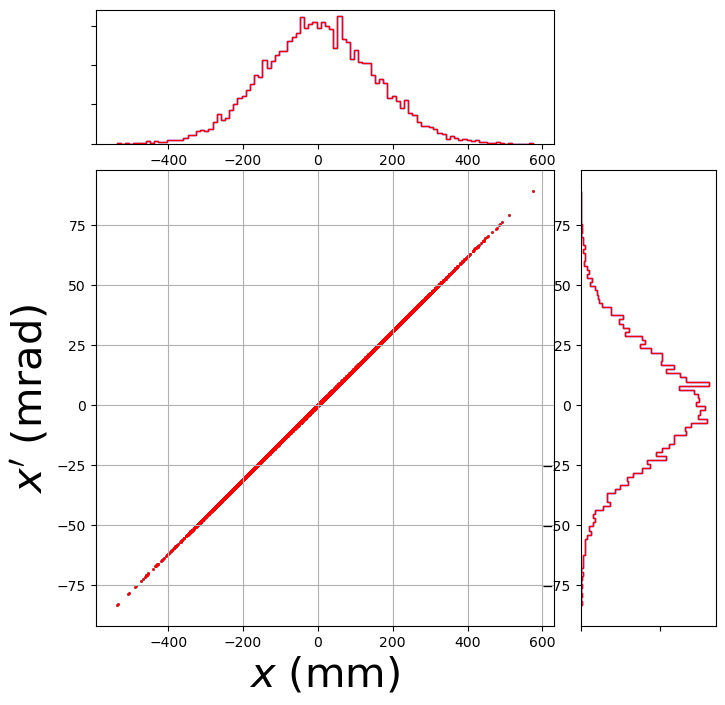

In [255]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Beamline

In [256]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

### Construct Beamline List

In [257]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [258]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [259]:
fodo_list[0].element_properties["type"]

'quadrupole'

In [260]:
fodo = Beamline("fodo", fodo_list)

In [261]:
fodo.get_num_beamline_elements()

9

In [262]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [263]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [264]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [265]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.927187738405508e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.966452576433268e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [266]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    9.92719    9.96645
         1         d1      drift    5.00000    5.40000      10000/     10000    9.92719    9.96645
         2         b1      sbend    1.50000    6.90000       9977/     10000    9.93004    9.85972
         3         d1      drift    5.00000   11.90000       9456/     10000    9.80662    8.65205
         4         qd quadrupole    0.40000   12.30000       9449/     10000    9.78093    8.64632
         5         d1      drift    5.00000   17.30000       5744/     10000    4.94465    7.64323
         6         b1      sbend    1.50000   18.80000       4014/     10000    4.32701    5.47890
         7         d1      drift    5.00000   23.80000       1842/     10000    3.68106    2.65961
         8         m1     marker    0.00000   23.80000       1842/     10000    3.68106    2.65961


In [267]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [268]:
bunch.print_bunch_properties()

number of macro particles : 1842
beta_x                    : 1707.3766328751396 m
alpha_x                   : -44.38819338931149 m^(1/2)
emittance_x               : 3.68106073996283e-06 mm-mrad
beta_y                    : 3421.758212204653 m
alpha_y                   : -372.7247939690699 m^(1/2)
emittance_y               : 2.6596056592123336e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.8


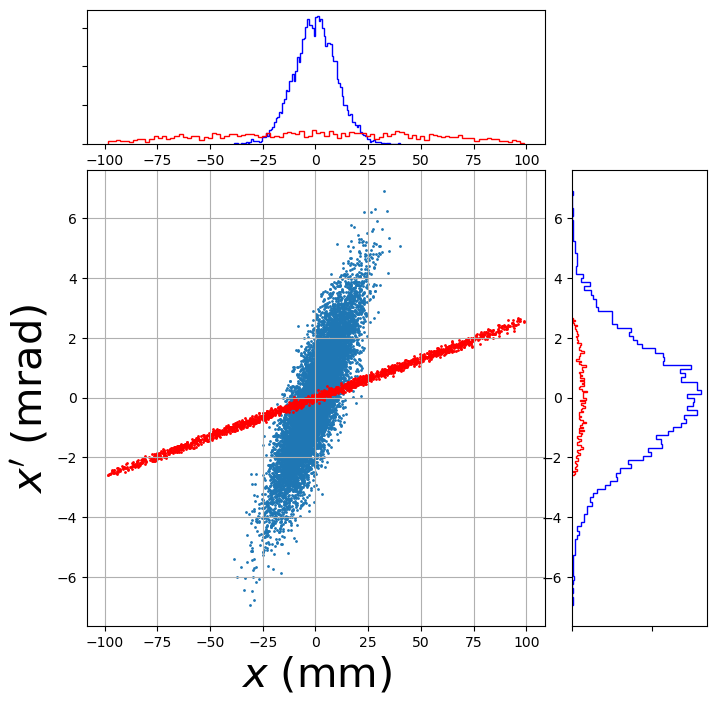

In [269]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

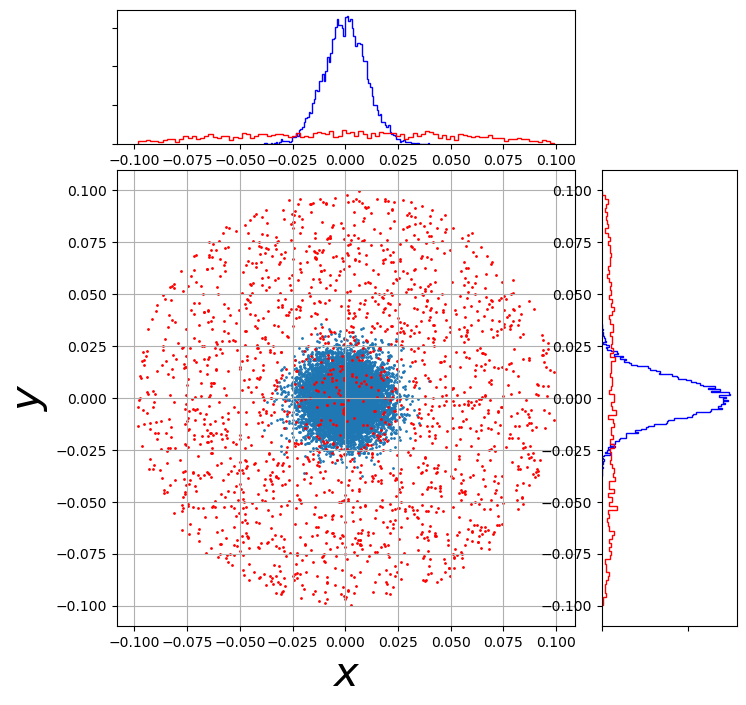

In [270]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Element and Beamline Slicing

## Element Slicing

In [271]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt

In [272]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])

In [273]:
new_elements = d1.slice_element(4)

In [274]:
for element in new_elements:
    element.print_element_properties()

element name     : d1_sliced_0
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_1
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_2
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]
element name     : d1_sliced_3
element type     : drift
element length   : 1.25
element strength : 0
element aperture : ['circular', 0.1]


### Beamline Slicing

In [275]:
d1 = Drift("d1", "drift", 5)#, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5)#, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2)#, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2)#, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker")#, aperture=['circular', 1e-1])

In [276]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [277]:
fodo = Beamline("fodo", fodo_list)

In [278]:
fodo.get_num_beamline_elements()

9

In [279]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   b1      sbend  1.500 22.500  6.900
   d1      drift  5.000  0.000 11.900
   qd quadrupole  0.400 -1.200 12.300
   d1      drift  5.000  0.000 17.300
   b1      sbend  1.500 22.500 18.800
   d1      drift  5.000  0.000 23.800
   m1     marker  0.000  0.000 23.800


In [280]:
fodo.slice_beamline(4)

In [281]:
fodo.print_sliced_beamline()

qf_sliced_0 quadrupole  0.100  1.200  0.100
qf_sliced_1 quadrupole  0.100  1.200  0.200
qf_sliced_2 quadrupole  0.100  1.200  0.300
qf_sliced_3 quadrupole  0.100  1.200  0.400
d1_sliced_0      drift  1.250  0.000  1.650
d1_sliced_1      drift  1.250  0.000  2.900
d1_sliced_2      drift  1.250  0.000  4.150
d1_sliced_3      drift  1.250  0.000  5.400
b1_sliced_0      sbend  0.375  5.625  5.775
b1_sliced_1      sbend  0.375  5.625  6.150
b1_sliced_2      sbend  0.375  5.625  6.525
b1_sliced_3      sbend  0.375  5.625  6.900
d1_sliced_0      drift  1.250  0.000  8.150
d1_sliced_1      drift  1.250  0.000  9.400
d1_sliced_2      drift  1.250  0.000 10.650
d1_sliced_3      drift  1.250  0.000 11.900
qd_sliced_0 quadrupole  0.100 -1.200 12.000
qd_sliced_1 quadrupole  0.100 -1.200 12.100
qd_sliced_2 quadrupole  0.100 -1.200 12.200
qd_sliced_3 quadrupole  0.100 -1.200 12.300
d1_sliced_0      drift  1.250  0.000 13.550
d1_sliced_1      drift  1.250  0.000 14.800
d1_sliced_2      drift  1.250  0

In [282]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y, seed=24289)

In [283]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [284]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.927187738405508e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.966452576433268e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [285]:
fodo.propagate_sliced_beamline(bunch)

In [286]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [287]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 1707.376632875134 m
alpha_x                   : -44.388193389311304 m^(1/2)
emittance_x               : 9.92718773840471e-06 mm-mrad
beta_y                    : 3421.7582122046542 m
alpha_y                   : -372.72479396906994 m^(1/2)
emittance_y               : 9.966452576461366e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 23.799999999999997


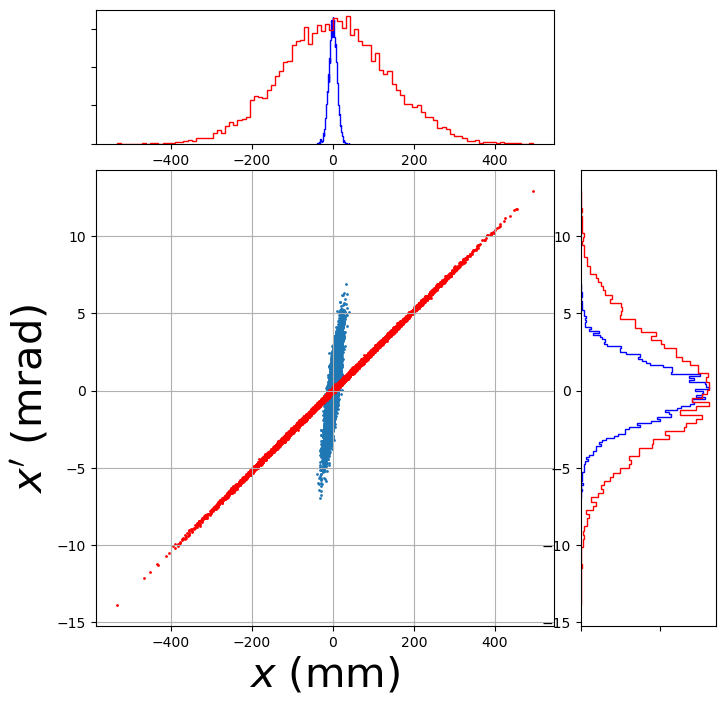

In [288]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

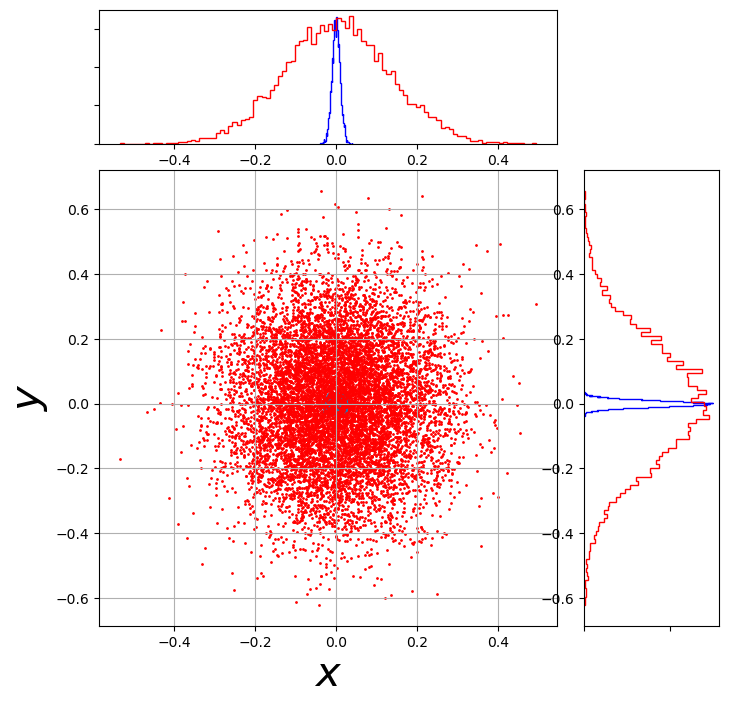

In [289]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()